In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('./datasets/USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
X = df['Avg. Area Income']
Y = df['Price']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [8]:
y_train.size

3750

In [9]:
sns.set_theme(style='darkgrid')

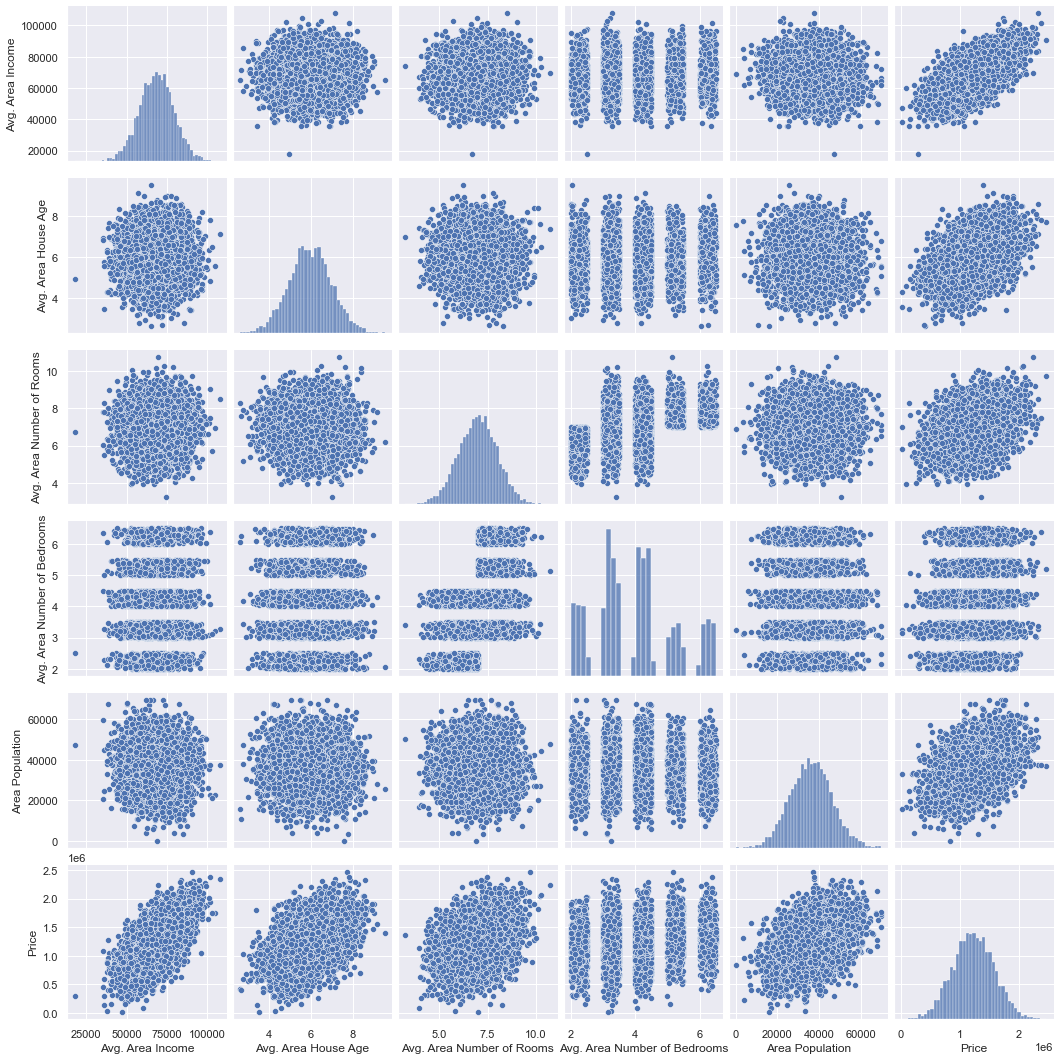

In [10]:
sns.pairplot(df)

C:\Users\91725\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area Population'>

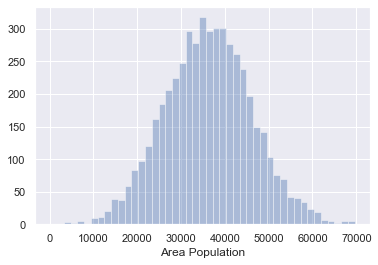

In [11]:
sns.distplot(df['Area Population'], kde=False)

<AxesSubplot:>

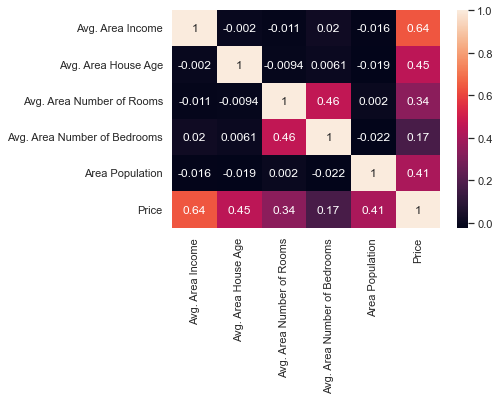

In [12]:
sns.heatmap(df.corr(),annot=True)

income vs price, area house age vs price, area population, no of rooms

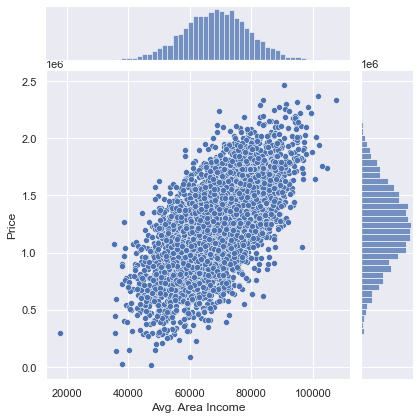

In [13]:
sns.jointplot(x='Avg. Area Income', y='Price', data=df)

# linear regression model

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Using individual features

In [15]:
X = np.array(df['Avg. Area Income'])
Y = np.array(df['Price'])

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [17]:
m, c = np.polyfit(x_train, y_train, deg=1)

In [18]:
m, c

(21.30214546656967, -231151.64855068375)

In [19]:
x_test[7], y_test[7]

(59866.94770020468, 1039380.7224796106)

In [20]:
my_ans = (21.30214546656967*59866.94770020468) - 231151.64855068375
print(my_ans)

1044142.7799985948


In [21]:
def pred():
    l = []
    for x in x_test:
        y = 21.30214546656967*x - 231151.64855068375
        l.append(y)
    return l

In [22]:
pred_values = pred()

Using second feature

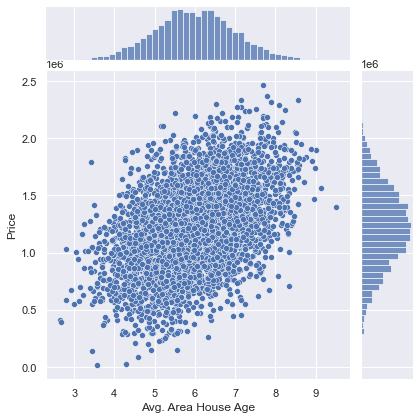

In [23]:
sns.jointplot(x=df['Avg. Area House Age'], y=df['Price'], data=df)

In [24]:
X1 = np.array(df['Avg. Area House Age'])
Y1 = np.array(df['Price'])

In [25]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state=42)

In [26]:
m1, c1 = np.polyfit(x1_train, y1_train, deg=1)

In [27]:
m1, c1

(162866.55662939904, 256743.15254731505)

In [28]:
x1_test[8], y1_test[8]

(6.648548092054467, 832475.189015321)

In [29]:
my_pred = 162866.55662939904 * 6.648548092054467 + 256743.15254731505
my_pred

1339569.2868851868

Using 3rd feature

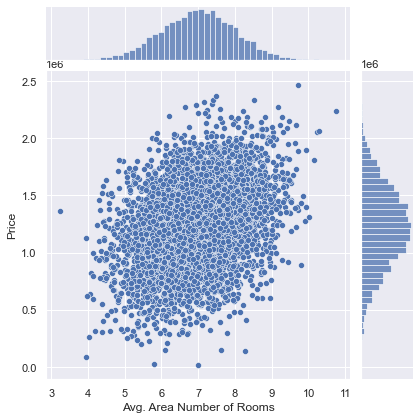

In [30]:
sns.jointplot(x=df['Avg. Area Number of Rooms'], y=df['Price'], data=df)

In [31]:
X2 = np.array(df['Avg. Area Number of Rooms'])
Y2 = np.array(df['Price'])

In [32]:
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, random_state=42)

In [33]:
m2, c2 = np.polyfit(x2_train, y2_train, deg=1)

In [34]:
m2, c2

(115968.77865455826, 419874.8210100658)

In [35]:
x2_test[7], y2_test[7]

(5.899076341909404, 1039380.7224796106)

In [36]:
my_pred = 115968.77865455826 * 5.899076341909404 + 419874.8210100658
my_pred

1103983.4995712987

Using 4th feature

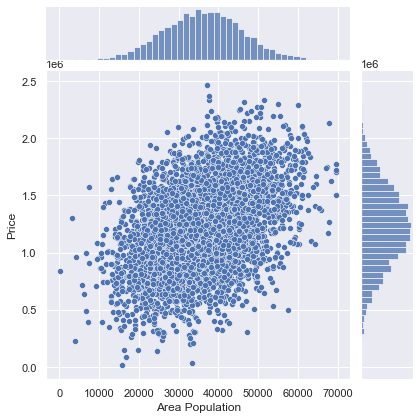

In [37]:
sns.jointplot(x=df['Area Population'], y=df['Price'], data=df)

In [38]:
X3 = np.array(df['Area Population'])
Y3 = np.array(df['Price'])

In [39]:
x3_train, x3_test, y3_train, y3_test = train_test_split(X3, Y3, random_state=42)

In [40]:
m3, c3 = np.polyfit(x3_train, y3_train, deg=1)

In [41]:
m3, c3

(14.552196587453693, 704071.4571407142)

In [42]:
x3_test[7], y3_test[7]

(32064.597156277174, 1039380.7224796106)

In [43]:
my_pred = 14.552196587453693 * 32064.597156277174  + 704071.4571407142
my_pred

1170681.7784563683

In [44]:
import matplotlib.pyplot as plt

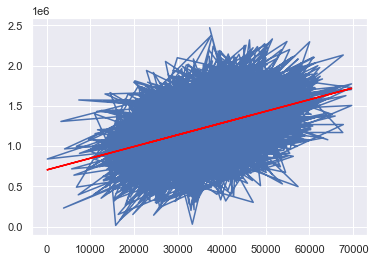

In [53]:
plt.plot(X3, Y3)
plt.plot(X3, 14.552196587453693*X3+704071.4571407142, color='red')

In [54]:
x1, x2, x3 = np.polyfit(X3, Y3, deg=2)

In [55]:
y = x1*(32064.597156277174**2) + x2*32064.597156277174 + x3
y

1173836.6058169585

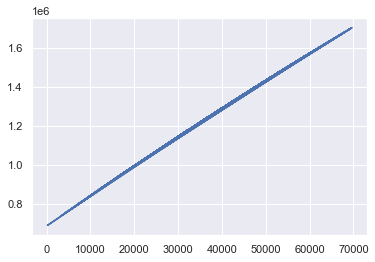

In [56]:
plt.plot(X3, x1*(X3**2) + x2*X3 + x3)

In [60]:
x1, x2, x3, x4 = np.polyfit(X3, Y3, deg=3)
x1, x2, x3, x4

(-1.1963338179997778e-09,
 0.0001150256160427387,
 11.269127776743288,
 732204.6440145806)

In [58]:
y = x1*(32064.597156277174**3)+x2*(32064.597156277174**2) + x3*32064.597156277174 + x4
y

1172367.5887182984

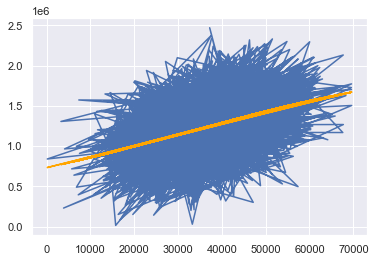

In [61]:
plt.plot(X3, Y3)
plt.plot(X3, x1*(X3**3)+x2*(X3**2) + x3*X3 + x4, color='orange')